# Curso de Georreferenciamento em Python - Aula 1 - Prof. Fábio Novaes

Substitua os valores abaixo.

In [ ]:
nome = 'Felipe Moreira Rios'
equipe = 'Equipe 10'
print(f'Nome: {nome}\nEquipe: {equipe}')

Nome: Felipe Moreira Rios
Equipe: Equipe 10


## Exercícios Básicos de Python e Geopandas

Os alunos devem reproduzir os exemplos abaixo e fazer os exercícios no final com uma cidade aleatória de PE.

In [ ]:
import pandas

pandas.__version__

'2.2.2'

In [ ]:
import geopandas

geopandas.__version__

'1.0.1'

In [ ]:
import pandas as pd

In [ ]:
import geopandas as gpd

In [ ]:
# Data for five large global cities (one from each continent)
data = {
    "Nome": ["Nova York", "São Paulo", "Tokyo", "Lagos", "Sydney"],
    "População": [8419600, 12325232, 13929286, 15000000, 5312163],  # População aproximada
    "Latitude": [40.7128, -23.5505, 35.6895, 6.5244, -33.8688],
    "Longitude": [-74.0060, -46.6333, 139.6917, 3.3792, 151.2093]
}

In [ ]:
type(data)

dict

In [ ]:
data["Nome"]

['Nova York', 'São Paulo', 'Tokyo', 'Lagos', 'Sydney']

In [ ]:
type(data["Nome"])

list

In [ ]:
data["Nome"][0]

'Nova York'

In [ ]:
# Create DataFrame
cities_df = pd.DataFrame(data)

In [ ]:
cities_df

,Nome,População,Latitude,Longitude
0,Nova York,8419600,40.7128,-74.0060
1,São Paulo,12325232,-23.5505,-46.6333
2,Tokyo,13929286,35.6895,139.6917
3,Lagos,15000000,6.5244,3.3792
4,Sydney,5312163,-33.8688,151.2093


In [ ]:
cities_df['Nome']

,Nome
0,Nova York
1,São Paulo
2,Tokyo
3,Lagos
4,Sydney


In [ ]:
cities_df[['Nome', 'População']]

,Nome,População
0,Nova York,8419600
1,São Paulo,12325232
2,Tokyo,13929286
3,Lagos,15000000
4,Sydney,5312163


# Introduzindo GeoDataFrames e GeoSeries

In [ ]:
type(cities_df)

pandas.core.frame.DataFrame

In [ ]:
gdf = gpd.GeoDataFrame(
    cities_df,
    geometry=gpd.points_from_xy(
        cities_df['Longitude'],
          cities_df['Latitude']
          )
        )

In [ ]:
gdf

,Nome,População,Latitude,Longitude,geometry
0,Nova York,8419600,40.7128,-74.0060,POINT (-74.006 40.7128)
1,São Paulo,12325232,-23.5505,-46.6333,POINT (-46.6333 -23.5505)
2,Tokyo,13929286,35.6895,139.6917,POINT (139.6917 35.6895)
3,Lagos,15000000,6.5244,3.3792,POINT (3.3792 6.5244)
4,Sydney,5312163,-33.8688,151.2093,POINT (151.2093 -33.8688)


In [ ]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Nome       5 non-null      object  
 1   População  5 non-null      int64   
 2   Latitude   5 non-null      float64 
 3   Longitude  5 non-null      float64 
 4   geometry   5 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 332.0+ bytes


In [ ]:
gdf['geometry']

,geometry
0,POINT (-74.006 40.7128)
1,POINT (-46.6333 -23.5505)
2,POINT (139.6917 35.6895)
3,POINT (3.3792 6.5244)
4,POINT (151.2093 -33.8688)


In [ ]:
gdf.geometry

,geometry
0,POINT (-74.006 40.7128)
1,POINT (-46.6333 -23.5505)
2,POINT (139.6917 35.6895)
3,POINT (3.3792 6.5244)
4,POINT (151.2093 -33.8688)


In [ ]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

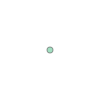

In [ ]:
gdf['geometry'][0]

In [ ]:
type(gdf['geometry'][0])

shapely.geometry.point.Point

# Polígonos


In [ ]:
wisconsin = 'POLYGON((-90.6303 42.5116,-87.0241 42.4954,-87.1477 43.3721,-87.1230 43.6838,-86.9911 44.1694,-86.8579 44.4828,-86.6876 44.8792,-86.2523 45.2343,-86.7535 45.4418,-87.1024 45.4438,-87.1724 45.3531,-87.3193 45.2401,-87.4100 45.1995,-87.4443 45.0784,-87.6379 45.0987,-87.6956 45.2217,-87.6462 45.3367,-87.6956 45.3869,-87.8549 45.3425,-87.7945 45.4813,-87.7945 45.5679,-87.7876 45.6764,-87.9936 45.7934,-88.1145 45.8077,-88.0733 45.8728,-88.1982 45.9521,-88.5498 46.0122,-88.7036 45.9970,-88.8451 46.0380,-89.0909 46.1389,-90.1195 46.3412,-90.4147 46.5664,-89.9615 47.2876,-90.6578 47.3100,-92.0352 46.7079,-92.2948 46.5928,-92.2975 46.0761,-92.3579 46.0132,-92.5227 45.9769,-92.7466 45.8135,-92.8564 45.6140,-92.7754 45.5477,-92.6587 45.4293,-92.7136 45.3029,-92.7466 44.9648,-92.7686 44.7877,-92.6422 44.6530,-92.3552 44.5504,-92.2632 44.4652,-92.0654 44.4024,-91.8745 44.2580,-91.6383 44.0600,-91.4941 43.9612,-91.3184 43.8296,-91.2524 43.6440,-91.2305 43.5167,-91.2085 43.3342,-91.0547 43.2932,-91.1865 43.1651,-91.1536 43.0257,-91.1426 42.9082,-91.0547 42.7692,-90.7910 42.6915,-90.7031 42.6340,-90.6303 42.5096,-90.6303 42.5116))'

In [ ]:
# Se fosse uma linha
# linha = 'LINESTRING(-90.6303 42.5116, -87.0241 42.4954)'

In [ ]:
data = {
    "Nome": ["Wisconsin"],
    "População": [5911000],  # População aproximada
    "geometry": [wisconsin],
}

In [ ]:
gdf = gpd.GeoDataFrame(data)

In [ ]:
gdf.head()

,Nome,População,geometry
0,Wisconsin,5911000,"POLYGON((-90.6303 42.5116,-87.0241 42.4954,-87..."


In [ ]:
gdf['geometry'][0]

'POLYGON((-90.6303 42.5116,-87.0241 42.4954,-87.1477 43.3721,-87.1230 43.6838,-86.9911 44.1694,-86.8579 44.4828,-86.6876 44.8792,-86.2523 45.2343,-86.7535 45.4418,-87.1024 45.4438,-87.1724 45.3531,-87.3193 45.2401,-87.4100 45.1995,-87.4443 45.0784,-87.6379 45.0987,-87.6956 45.2217,-87.6462 45.3367,-87.6956 45.3869,-87.8549 45.3425,-87.7945 45.4813,-87.7945 45.5679,-87.7876 45.6764,-87.9936 45.7934,-88.1145 45.8077,-88.0733 45.8728,-88.1982 45.9521,-88.5498 46.0122,-88.7036 45.9970,-88.8451 46.0380,-89.0909 46.1389,-90.1195 46.3412,-90.4147 46.5664,-89.9615 47.2876,-90.6578 47.3100,-92.0352 46.7079,-92.2948 46.5928,-92.2975 46.0761,-92.3579 46.0132,-92.5227 45.9769,-92.7466 45.8135,-92.8564 45.6140,-92.7754 45.5477,-92.6587 45.4293,-92.7136 45.3029,-92.7466 44.9648,-92.7686 44.7877,-92.6422 44.6530,-92.3552 44.5504,-92.2632 44.4652,-92.0654 44.4024,-91.8745 44.2580,-91.6383 44.0600,-91.4941 43.9612,-91.3184 43.8296,-91.2524 43.6440,-91.2305 43.5167,-91.2085 43.3342,-91.0547 43.2932,-91.

In [ ]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries.from_wkt(data['geometry']))

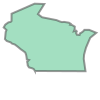

In [ ]:
gdf['geometry'][0]

In [ ]:
type(gdf['geometry'][0])

shapely.geometry.polygon.Polygon

# Abrindo um Shapefile

Formatos típicos georeferenciados são shapefiles (.shp) e GeoJSON (.gjson). Vamos carregar os polígonos das fronteiras de todos os municípios do Brasil, baixando do [IBGE](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
municipios_br = gpd.read_file('/content/drive/MyDrive/BR_Municipios_2023/BR_Municipios_2023.shp', driver='ESRI Shapefile')

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  return ogr_read(


In [ ]:
municipios_br.head()

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,CD_REGIAO,NM_REGIAO,CD_CONCURB,NM_CONCURB,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,110005,Cacoal,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,7067.127,"POLYGON ((-61.93075 -11.97349, -61.93234 -11.9..."
1,1100023,Ariquemes,110002,Ariquemes,1101,Porto Velho,11,Rondônia,1,Norte,None,None,4426.143,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,110006,Vilhena,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,1314.352,"POLYGON ((-60.56035 -13.32206, -60.52518 -13.3..."
3,1100049,Cacoal,110005,Cacoal,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,3793.000,"POLYGON ((-61.00075 -11.25298, -61.0008 -11.29..."
4,1100056,Cerejeiras,110006,Vilhena,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,2783.297,"POLYGON ((-60.82068 -13.11944, -60.81773 -13.1..."


In [ ]:
# colunas
print(municipios_br.columns)

#primeira linha
print(municipios_br.head())

# tamanho do DataFrame
print(f'Tamanho de municipios_pe: {municipios_pe.shape}')

print(municipios_br['CD_UF'].unique())

print(municipios_br['NM_UF'].unique())
belo_jardim = municipios_pe[municipios_pe['NM_MUN'].str.contains('Belo Jardim', case=False, na=False)]





Index(['CD_MUN', 'NM_MUN', 'CD_RGI', 'NM_RGI', 'CD_RGINT', 'NM_RGINT', 'CD_UF',
       'NM_UF', 'CD_REGIAO', 'NM_REGIAO', 'CD_CONCURB', 'NM_CONCURB',
       'AREA_KM2', 'geometry'],
      dtype='object')
    CD_MUN                 NM_MUN  CD_RGI     NM_RGI CD_RGINT     NM_RGINT  \
0  1100015  Alta Floresta D'Oeste  110005     Cacoal     1102    Ji-Paraná   
1  1100023              Ariquemes  110002  Ariquemes     1101  Porto Velho   
2  1100031                 Cabixi  110006    Vilhena     1102    Ji-Paraná   
3  1100049                 Cacoal  110005     Cacoal     1102    Ji-Paraná   
4  1100056             Cerejeiras  110006    Vilhena     1102    Ji-Paraná   

  CD_UF     NM_UF CD_REGIAO NM_REGIAO CD_CONCURB NM_CONCURB  AREA_KM2  \
0    11  Rondônia         1     Norte       None       None  7067.127   
1    11  Rondônia         1     Norte       None       None  4426.143   
2    11  Rondônia         1     Norte       None       None  1314.352   
3    11  Rondônia         1     Nor

## Exercício 1
Faça um filtro para escolher apenas os municípios de PE. Onde tiver ```'__'``` ou ```...```, substitua pelo seu código.

In [ ]:
#filtro para escolher apenas os municípios de PE
municipios_pe = municipios_br[municipios_br['CD_UF'] == 15]  # 15 é o código de Pernambuco
print(municipios_pe.head())


Empty GeoDataFrame
Columns: [CD_MUN, NM_MUN, CD_RGI, NM_RGI, CD_RGINT, NM_RGINT, CD_UF, NM_UF, CD_REGIAO, NM_REGIAO, CD_CONCURB, NM_CONCURB, AREA_KM2, geometry]
Index: []


## Exercício 2
Escolha uma cidade aleatória de PE e plote a região usando a coluna ```geometry```.

         NM_MUN                                           geometry
0  Nova Ipixuna  POLYGON ((-49.22139 -5.2992, -49.22302 -5.2979...


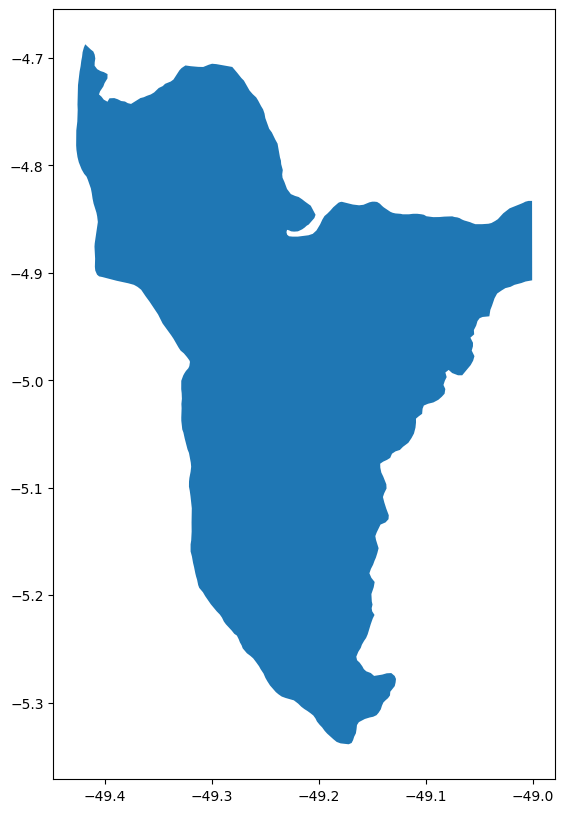

In [ ]:
import random
import geopandas as gpd

#filtrar os municípios de Pernambuco (código CD_UF = 15)
municipios_pe = municipios_br[municipios_br['CD_UF'] == '15']  # Pernambuco tem código '15'

#verificar se o DataFrame contém dados de Pernambuco
if municipios_pe.shape[0] > 0:
    #escolher uma cidade aleatória de PE (sem random_state para variabilidade)
    cidade_aleatoria = municipios_pe.sample(n=1).reset_index()

    # exibir o nome e a geometria da cidade aleatória
    print(cidade_aleatoria[['NM_MUN', 'geometry']])

    # garantir que a geometria está sendo tratada corretamente
    cidade_aleatoria = gpd.GeoDataFrame(cidade_aleatoria, geometry='geometry')

    #plotar a geometria da cidade aleatória
    cidade_aleatoria.plot(figsize=(10, 10), legend=True)
else:
    print("Não há dados de municípios de Pernambuco no DataFrame.")


## Exercício 3
Descubra se a sua cidade é maior ou menor do que a cidade de Belo Jardim em área utilizando a coluna ```AREA_KM2```. Depois, verifique que o comando ```geometry.area``` com coordenadas de Mercator (EPSG 3857) dá um resultado próximo da área da coluna para a sua cidade aleatória.

In [ ]:
#verificar as primeiras linhas do DataFrame de Pernambuco
print(municipios_pe['NM_MUN'].unique())

#verificar as cidades em Pernambuco que contém "Belo Jardim" (com variações)
print(municipios_pe[municipios_pe['NM_MUN'].str.contains('Belo Jardim', case=False, na=False)])


['Abaetetuba' 'Abel Figueiredo' 'Acará' 'Afuá' 'Água Azul do Norte'
 'Alenquer' 'Almeirim' 'Altamira' 'Anajás' 'Ananindeua' 'Anapu'
 'Augusto Corrêa' 'Aurora do Pará' 'Aveiro' 'Bagre' 'Baião' 'Bannach'
 'Barcarena' 'Belém' 'Belterra' 'Benevides' 'Bom Jesus do Tocantins'
 'Bonito' 'Bragança' 'Brasil Novo' 'Brejo Grande do Araguaia'
 'Breu Branco' 'Breves' 'Bujaru' 'Cachoeira do Piriá' 'Cachoeira do Arari'
 'Cametá' 'Canaã dos Carajás' 'Capanema' 'Capitão Poço' 'Castanhal'
 'Chaves' 'Colares' 'Conceição do Araguaia' 'Concórdia do Pará'
 'Cumaru do Norte' 'Curionópolis' 'Curralinho' 'Curuá' 'Curuçá'
 'Dom Eliseu' 'Eldorado do Carajás' 'Faro' 'Floresta do Araguaia'
 'Garrafão do Norte' 'Goianésia do Pará' 'Gurupá' 'Igarapé-Açu'
 'Igarapé-Miri' 'Inhangapi' 'Ipixuna do Pará' 'Irituia' 'Itaituba'
 'Itupiranga' 'Jacareacanga' 'Jacundá' 'Juruti' 'Limoeiro do Ajuru'
 'Mãe do Rio' 'Magalhães Barata' 'Marabá' 'Maracanã' 'Marapanim'
 'Marituba' 'Medicilândia' 'Melgaço' 'Mocajuba' 'Moju' 'Mojuí dos 

In [ ]:
import pyproj
import numpy as np

#filtrar Capim Grosso, Bahia (modifique para sua cidade)
capim_grosso = municipios_br[municipios_br['NM_MUN'] == 'Capim Grosso'].iloc[0]

#acessar Belo Jardim diretamente pelo índice 18
belo_jardim = municipios_pe.iloc[18]

#comparar a área da cidade aleatória com Belo Jardim
if capim_grosso['AREA_KM2'] > belo_jardim['AREA_KM2']:
    print(f'{capim_grosso["NM_MUN"]} é maior do que Belo Jardim')
else:
    print(f'{capim_grosso["NM_MUN"]} é menor do que Belo Jardim')


Capim Grosso é menor do que Belo Jardim


In [ ]:
#converter para o CRS EPSG 3857 (Mercator) e calcular a área
area_mercator = cidade_aleatoria.geometry.to_crs(epsg=3857).area[0] / 1000000  # Convertendo de m² para km²
print(f'Área (Mercator) da cidade aleatória: {area_mercator:.3f} km²')

Área (Mercator) da cidade aleatória: 1586.538 km²


Para obtermos a mesma área do IBGE, temos que criar um novo CRS com a projeção utilizada pelo orgão (ver [Informações técnicas e legais para a utilização dos dados publicados](https://biblioteca.ibge.gov.br/index.php/biblioteca-catalogo?view=detalhes&id=2102152)).

In [ ]:
#criar o CRS do IBGE
crs_proj4 = '+proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=5000000 +y_0=10000000 +ellps=GRS80 +units=m +no_defs'
crs_ibge = pyproj.CRS.from_proj4(crs_proj4)

#calcular a área com o CRS do IBGE
area_ibge = np.round(cidade_aleatoria.geometry.to_crs(crs_ibge).area[0] / 1000000, 3)  # Área em km²
print(f'Área (IBGE) da cidade aleatória: {area_ibge} km²')

Área (IBGE) da cidade aleatória: 1564.184 km²
